In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_columns = 500

%load_ext autoreload
%autoreload 2

%matplotlib inline

In [2]:
# Target variable
map_immunogenicity = {"Negative": 1, "Positive": 0}
imap_immunogenicity = {v: k for k,v in map_immunogenicity.items()}

# Data

## MHC-I

In [3]:
f_ = f"mhc1-peptides.csv"
df_data = pd.read_csv(f_).set_index("Peptide")
#df_mhc1["mhc_class"] = 1

print(df_data.shape)
df_data.head(4)

(7575, 1)


,Immunogenicity
Peptide,
AAAAAAAALY,Negative
AAAAAIFVI,Positive
AAADSAVRLW,Negative
AAAGAAVTV,Positive


## Length Choice

In [4]:
df_data["length"] = df_data.index.str.len()

print(df_data.shape)
df_data.head(4)

(7575, 2)


,Immunogenicity,length
Peptide,,
AAAAAAAALY,Negative,10
AAAAAIFVI,Positive,9
AAADSAVRLW,Negative,10
AAAGAAVTV,Positive,9


In [5]:
df_data["length"].value_counts(normalize=True)

9     0.625479
10    0.244224
11    0.092673
8     0.037624
Name: length, dtype: float64

In [6]:
length_chosen = 9

print(df_data.shape)
df_data = df_data[length_chosen == df_data["length"]]

print(df_data.shape, " length {}".format(length_chosen))

(7575, 2)
(4738, 2)  length 9


In [7]:
df_data.index.value_counts().max()

1

# Label

In [8]:
df_data["label"] = df_data["Immunogenicity"].map(map_immunogenicity)

print( df_data["label"].value_counts(dropna=False))
print('-' * 20)
print( df_data["label"].value_counts(dropna=False, normalize=True))

0    2532
1    2206
Name: label, dtype: int64
--------------------
0    0.534403
1    0.465597
Name: label, dtype: float64


# Mutation Frequencies

In [9]:
import logomaker # pip install logomaker # very useful for visualising aligned sequences: https://logomaker.readthedocs.io/en/latest/

#from utils import sequences_to_frequency_matrix, sequences_to_count_matrix

ModuleNotFoundError: No module named 'logomaker'

In [10]:
df_data.head(4)

,Immunogenicity,length,label
Peptide,,,
AAAAAIFVI,Positive,9,0
AAAGAAVTV,Positive,9,0
AAAGVVHAV,Negative,9,1
AAAKPTPPK,Negative,9,1


In [13]:
df_count_matrix = logomaker.alignment_to_matrix(df_data.index.tolist())
df_count_matrix

,A,C,D,E,F,G,H,I,K,L,M,N,P,Q,R,S,T,V,W,Y
pos,,,,,,,,,,,,,,,,,,,,
0,501.0,54.0,99.0,132.0,261.0,250.0,123.0,319.0,513.0,393.0,114.0,130.0,35.0,135.0,420.0,400.0,270.0,318.0,50.0,221.0
1,268.0,21.0,19.0,569.0,67.0,44.0,19.0,267.0,15.0,1078.0,229.0,18.0,328.0,376.0,88.0,346.0,468.0,376.0,12.0,130.0
2,459.0,45.0,314.0,168.0,242.0,164.0,123.0,334.0,486.0,449.0,144.0,217.0,122.0,171.0,294.0,289.0,171.0,241.0,90.0,215.0
3,304.0,59.0,458.0,517.0,101.0,401.0,103.0,179.0,313.0,282.0,62.0,183.0,403.0,207.0,233.0,336.0,240.0,210.0,53.0,94.0
4,300.0,53.0,234.0,264.0,233.0,338.0,170.0,311.0,316.0,483.0,61.0,191.0,239.0,156.0,288.0,247.0,259.0,379.0,58.0,158.0
5,312.0,70.0,129.0,184.0,251.0,250.0,156.0,436.0,219.0,546.0,92.0,168.0,240.0,230.0,226.0,304.0,332.0,447.0,54.0,92.0
6,373.0,54.0,146.0,304.0,191.0,131.0,218.0,259.0,242.0,507.0,93.0,182.0,275.0,257.0,270.0,297.0,314.0,374.0,108.0,143.0
7,375.0,47.0,113.0,354.0,155.0,224.0,143.0,144.0,382.0,415.0,74.0,181.0,156.0,268.0,303.0,462.0,431.0,296.0,58.0,157.0
8,366.0,16.0,4.0,9.0,459.0,6.0,15.0,320.0,210.0,1184.0,125.0,6.0,15.0,17.0,98.0,20.0,47.0,668.0,345.0,808.0


In [16]:
df_frequency_matrix = df_count_matrix / len(df_data)

print(df_frequency_matrix.sum(axis=1))
df_frequency_matrix

pos
0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
5    1.0
6    1.0
7    1.0
8    1.0
dtype: float64


,A,C,D,E,F,G,H,I,K,L,M,N,P,Q,R,S,T,V,W,Y
pos,,,,,,,,,,,,,,,,,,,,
0,0.105741,0.011397,0.020895,0.027860,0.055087,0.052765,0.025960,0.067328,0.108274,0.082946,0.024061,0.027438,0.007387,0.028493,0.088645,0.084424,0.056986,0.067117,0.010553,0.046644
1,0.056564,0.004432,0.004010,0.120093,0.014141,0.009287,0.004010,0.056353,0.003166,0.227522,0.048333,0.003799,0.069228,0.079358,0.018573,0.073027,0.098776,0.079358,0.002533,0.027438
2,0.096876,0.009498,0.066273,0.035458,0.051076,0.034614,0.025960,0.070494,0.102575,0.094766,0.030393,0.045800,0.025749,0.036091,0.062051,0.060996,0.036091,0.050865,0.018995,0.045378
3,0.064162,0.012453,0.096665,0.109118,0.021317,0.084635,0.021739,0.037780,0.066062,0.059519,0.013086,0.038624,0.085057,0.043689,0.049177,0.070916,0.050654,0.044322,0.011186,0.019840
4,0.063318,0.011186,0.049388,0.055720,0.049177,0.071338,0.035880,0.065640,0.066695,0.101942,0.012875,0.040312,0.050443,0.032925,0.060785,0.052132,0.054664,0.079992,0.012241,0.033347
5,0.065851,0.014774,0.027227,0.038835,0.052976,0.052765,0.032925,0.092022,0.046222,0.115238,0.019417,0.035458,0.050654,0.048544,0.047699,0.064162,0.070072,0.094344,0.011397,0.019417
6,0.078725,0.011397,0.030815,0.064162,0.040312,0.027649,0.046011,0.054664,0.051076,0.107007,0.019629,0.038413,0.058041,0.054242,0.056986,0.062685,0.066273,0.078936,0.022794,0.030182
7,0.079147,0.009920,0.023850,0.074715,0.032714,0.047277,0.030182,0.030393,0.080625,0.087590,0.015618,0.038202,0.032925,0.056564,0.063951,0.097509,0.090967,0.062474,0.012241,0.033136
8,0.077248,0.003377,0.000844,0.001900,0.096876,0.001266,0.003166,0.067539,0.044322,0.249894,0.026382,0.001266,0.003166,0.003588,0.020684,0.004221,0.009920,0.140988,0.072816,0.170536


(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]), <a list of 6 Text yticklabel objects>)

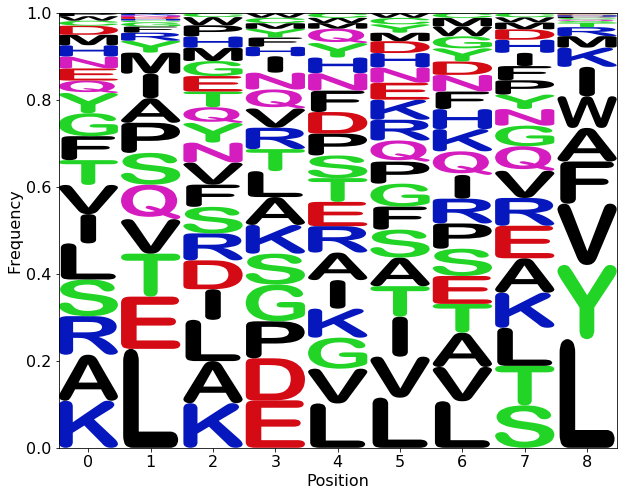

In [17]:
fontsize=16

logo_ = logomaker.Logo(df_frequency_matrix, figsize=(10, 8), 
                          shade_below=.5,
                          fade_below=.5,
                          font_name='Arial Rounded MT Bold', stack_order='small_on_top',)
plt.xlabel('Position', fontsize=fontsize)
plt.ylabel('Frequency', fontsize=fontsize)
plt.xticks(fontsize=fontsize); plt.yticks(fontsize=fontsize)

In [18]:
df_count_matrix.T.describe()

pos,0,1,2,3,4,5,6,7,8
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.00000,20.000000,20.000000,20.000000
mean,236.900000,236.900000,236.900000,236.900000,236.900000,236.90000,236.900000,236.900000,236.900000
std,151.301338,263.675219,123.669721,138.560988,109.253399,131.47179,110.583572,132.399277,325.873385
min,35.000000,12.000000,45.000000,53.000000,53.000000,54.00000,54.000000,47.000000,4.000000
25%,120.750000,20.500000,159.000000,102.500000,167.000000,149.25000,145.250000,143.750000,15.000000
50%,235.500000,179.500000,216.000000,221.500000,243.000000,228.00000,249.500000,202.500000,72.500000
75%,337.500000,353.500000,299.000000,318.750000,302.750000,306.00000,298.750000,359.250000,350.250000
max,513.000000,1078.000000,486.000000,517.000000,483.000000,546.00000,507.000000,462.000000,1184.000000


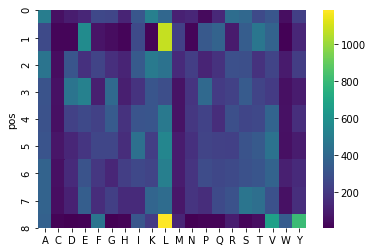

In [19]:
sns.heatmap(df_count_matrix, cmap='viridis')

# Modeling


In [22]:
import tensorflow as tf

from visualise import plot_history_results, pos_neg_histograms, plot_calibration_curve, plot_precision_recall_roc
#from ml_predictions import sequences_to_multiple_scores, sequences_to_mean_and_mutual_information_scores

tf.__version__

'2.0.0-beta1'

In [23]:
def generate_validation_df(x_one_hot, y_truth, model, index=None, col_predictions=None, cutoff_thresh=0.5):
    if not col_predictions:
        col_predictions = 'predictions'
    
    predictions = model.predict(x_one_hot)

    df = pd.DataFrame([pred[-1].item() for pred in predictions], columns=[col_predictions])
    df["actual"] = y_truth
    df[f'{col_predictions}_label'] = (df[col_predictions] >= cutoff_thresh).astype(int)
    
    if index:
        df.index = index
        
    n_correct = (df[f'{col_predictions}_label'] == df["actual"]).sum()
    accuracy = n_correct / df.shape[0]
    print(f'Accuracy: {accuracy * 100:0.1f}% (cutoff of {cutoff_thresh})')
    
    return df

##  Train Test Split

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
sequences_pos = df_data[df_data["label"] == 1].index.tolist()
sequences_neg = df_data[df_data["label"] == 0].index.tolist()

print(len(sequences_pos), len(sequences_neg))
print(len(set(sequences_pos)), len(set(sequences_neg)))
print(df_data["label"].value_counts(dropna=True, normalize=True))

2206 2532
2206 2532
0    0.534403
1    0.465597
Name: label, dtype: float64


In [26]:
# This code is quite old. You might consider using SMOTE: https://imbalanced-learn.readthedocs.io/en/stable/generated/imblearn.over_sampling.SMOTE.html

np.random.seed(seed=1)

frac_train = 0.9

balance_train = True

if balance_train:
    train_size = np.int(frac_train * np.min((len(sequences_pos), len(sequences_neg))))

    test_size_pos = len(sequences_pos) - train_size
    test_size_neg = len(sequences_neg) - train_size
    
    test_size_balanced = np.min([test_size_pos, test_size_neg])
else:
    test_size_pos = 1. - frac_train
    test_size_neg = 1. - frac_train

if frac_train == 1:
    if balance_train:
        sequences_pos_train = list(np.random.choice(sequences_pos, size=train_size, replace=False))
        sequences_neg_train = list(np.random.choice(sequences_neg, size=train_size, replace=False) )
    else:
        None # NEED TO ADD HERE
        
    sequences_pos_test, sequences_neg_test = [], []
else:
    sequences_pos_train, sequences_pos_test_all = train_test_split(sequences_pos, test_size=test_size_pos)
    sequences_neg_train, sequences_neg_test_all = train_test_split(sequences_neg, test_size=test_size_neg)
    
    if balance_train:
        sequences_pos_test = list(np.random.choice(sequences_pos_test_all, size=test_size_balanced, replace=False))
        sequences_neg_test = list(np.random.choice(sequences_neg_test_all, size=test_size_balanced, replace=False))
        
        sequences_pos_remaining = list(set(sequences_pos_test_all) - set(sequences_pos_test))
        sequences_neg_remaining = list(set(sequences_neg_test_all) - set(sequences_neg_test))

print('Train/Test')
print("{:,}, {:,} (positive)".format(len(sequences_pos_train), len(sequences_pos_test)))
print("{:,}, {:,} (negative)".format(len(sequences_neg_train), len(sequences_neg_test)))
print("\n{:,}, {:,} (remaining test (pos, neg))".format(len(sequences_pos_remaining), len(sequences_neg_remaining)))
sequences_pos_train[:3]

Train/Test
1,985, 221 (positive)
1,985, 221 (negative)

0, 326 (remaining test (pos, neg))


['MLLAFYEKI', 'SQFGTVTRF', 'KVSELKEEL']

In [27]:
test_size_pos, test_size_neg

(221, 547)

In [28]:
set(sequences_pos_train) & set(sequences_neg_train)

set()

## Preprocessing

In [39]:
AA_CHARS = ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']

def _sequence_lengths(seqs):
    return list(map(len, seqs))

def _max_length_sequence(seqs):
    return np.max(_sequence_lengths(seqs))

def sequences_to_one_hot_2d(seqs, chars=AA_CHARS, max_length=None):
    """

    :param seqs:
    :param chars:
    :return:

    Examples:    
    sequences_to_one_hot_2d(['ACGT', 'AAAA'])
    > array([[[1., 0., 0., 0.],
              [0., 1., 0., 0.],
              [0., 0., 1., 0.],
              [0., 0., 0., 1.]],

             [[1., 0., 0., 0.],
              [1., 0., 0., 0.],
              [1., 0., 0., 0.],
              [1., 0., 0., 0.]]])
              
    sequences_to_one_hot_2d(['AA', 'AC'])
    > array([[[1., 0., 0., 0.],
              [1., 0., 0., 0.]],
              
             [[1., 0., 0., 0.],
              [0., 1., 0., 0.]]])
              
    sequences_to_one_hot_2d(['AA', 'A']) # unequal lengths
    > array([[[1., 0., 0., 0.],
              [1., 0., 0., 0.]],
              
             [[1., 0., 0., 0.],
              [0., 0., 0., 0.]]])
    """
    if not max_length:
        sequence_length = _max_length_sequence(seqs)
        
    new_seqs = np.zeros((len(seqs), sequence_length, len(chars)))
    for ix_seq, seq in enumerate(seqs):
        for pos, char_ in enumerate(seq):
            new_seqs[ix_seq][pos][chars.index(char_)] = 1

    return new_seqs

In [40]:
np.random.seed(seed=1)

sequences_train = sequences_pos_train + sequences_neg_train
sequences_test =  sequences_pos_test + sequences_neg_test

sequences_train = list(np.random.choice(sequences_train, len(sequences_train), replace=False))
sequences_test = list(np.random.choice(sequences_test, len(sequences_test), replace=False))

print(len(sequences_train), len(sequences_test))
print(len(set(sequences_train )), len(set(sequences_test)))

3970 442
3970 442


In [41]:
df_data.head(4)

,Immunogenicity,length,label,training
Peptide,,,,
AAAAAIFVI,Positive,9,0,False
AAAGAAVTV,Positive,9,0,True
AAAGVVHAV,Negative,9,1,True
AAAKPTPPK,Negative,9,1,True


In [42]:
df_data['training'] = False

df_data.loc[sequences_train, 'training'] = True

print(df_data[['training', 'label']].groupby(['training', 'label']).size())
df_data['training'].value_counts(dropna=False)

training  label
False     0         547
          1         221
True      0        1985
          1        1985
dtype: int64


True     3970
False     768
Name: training, dtype: int64

In [43]:
X_train = sequences_to_one_hot_2d(sequences_train)

if sequences_test:
    X_test = sequences_to_one_hot_2d(sequences_test)
else:
    X_test = None

In [44]:
y_train = df_data.loc[sequences_train, "label"].tolist()

if sequences_test:
    y_test = df_data.loc[sequences_test, "label"].tolist()
else:
    y_test = None

In [45]:
print(pd.Series(y_train).value_counts(normalize=True))
print('-' * 20)
pd.Series(y_train).value_counts(normalize=False)

1    0.5
0    0.5
dtype: float64
--------------------


1    1985
0    1985
dtype: int64

## Training DNN

### Fit

In [46]:
n_nodes = 128 #1024 #128 #32, 512
dropout_rate = 0.2 #0.4
lambda_ = 0.01
# ===========

shape_ = X_train.shape[1:]

print(shape_)

dnn_inputs = tf.keras.layers.Input(shape=shape_)
x = tf.keras.layers.Flatten(input_shape=shape_)(dnn_inputs)
x = tf.keras.layers.Dense(n_nodes, activation="selu",
                          kernel_regularizer=tf.keras.regularizers.l2(lambda_),
                         activity_regularizer=tf.keras.regularizers.l1(lambda_))(x)
x = tf.keras.layers.Dropout(dropout_rate)(x, training=True)
x = tf.keras.layers.Dense(n_nodes, activation="selu",
                          kernel_regularizer=tf.keras.regularizers.l2(lambda_),
                         activity_regularizer=tf.keras.regularizers.l1(lambda_))(x)
x = tf.keras.layers.Dropout(dropout_rate)(x, training=True)
#x = tf.keras.layers.Dense(n_nodes, activation="selu")(x)
dnn_ouputs = tf.keras.layers.Dense(1, activation="sigmoid")(x)

dnn_model = tf.keras.Model(inputs=dnn_inputs, outputs=dnn_ouputs)

dnn_model.summary()

W1107 16:43:20.156002 140735947203456 deprecation.py:323] From /Users/eyalkazin/Work/Envs/sequence-learn-optimise-B1wjicjy/lib/python3.7/site-packages/tensorflow/python/keras/backend.py:4149: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


(9, 20)
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 9, 20)]           0         
_________________________________________________________________
flatten (Flatten)            (None, 180)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               23168     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)               

In [47]:
EPOCHS = 60

dnn_model.compile(optimizer="sgd", loss="binary_crossentropy", metrics=["acc"])

if sequences_test:
    validation_data = [X_test, y_test]
else:
    validation_data = None

dnn_history = dnn_model.fit(x=X_train, y=y_train, epochs=EPOCHS, 
              validation_data=validation_data
             )

Train on 3970 samples, validate on 442 samples
Epoch 1/60
3970/3970 [==============================] - 1s 165us/sample - loss: 4.0234 - acc: 0.6280 - val_loss: 3.8733 - val_acc: 0.6742
Epoch 2/60
3970/3970 [==============================] - 0s 40us/sample - loss: 3.7475 - acc: 0.7186 - val_loss: 3.6320 - val_acc: 0.7647
Epoch 3/60
3970/3970 [==============================] - 0s 42us/sample - loss: 3.5205 - acc: 0.7665 - val_loss: 3.4284 - val_acc: 0.7579
Epoch 4/60
3970/3970 [==============================] - 0s 39us/sample - loss: 3.3306 - acc: 0.7819 - val_loss: 3.2483 - val_acc: 0.7873
Epoch 5/60
3970/3970 [==============================] - 0s 43us/sample - loss: 3.1490 - acc: 0.7914 - val_loss: 3.0937 - val_acc: 0.7873
Epoch 6/60
3970/3970 [==============================] - 0s 40us/sample - loss: 2.9866 - acc: 0.8050 - val_loss: 2.9256 - val_acc: 0.7941
Epoch 7/60
3970/3970 [==============================] - 0s 41us/sample - loss: 2.8344 - acc: 0.8128 - val_loss: 2.7840 - val_acc: 

3970/3970 [==============================] - 0s 45us/sample - loss: 0.5576 - acc: 0.8504 - val_loss: 0.6187 - val_acc: 0.8054


removing val_acc
removing val_loss


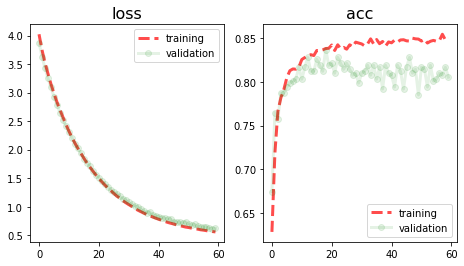

In [48]:
plot_history_results(dnn_history.history)

### Validate

In [49]:
df_y_train = generate_validation_df(X_train, y_train, dnn_model, index=sequences_train, col_predictions='pred_dnn')

print(df_y_train.shape)
df_y_train.head(4)

Accuracy: 85.3% (cutoff of 0.5)
(3970, 3)


,pred_dnn,actual,pred_dnn_label
RSRTIVHTL,0.912326,1,1
FLDSEPHLL,0.495965,0,0
AEIEIVKDL,0.843519,1,1
VIPQEIEEV,0.555912,1,1


In [50]:
df_y_test = generate_validation_df(X_test, y_test, dnn_model, index=sequences_test, col_predictions='pred_dnn')

print(df_y_test.shape)
df_y_test.head(4)

Accuracy: 79.6% (cutoff of 0.5)
(442, 3)


,pred_dnn,actual,pred_dnn_label
TPLLYPSLA,0.121243,0,0
KSMETKVQF,0.893066,1,1
FYTPLADQF,0.181091,0,0
FIDNTDSVV,0.360648,0,0


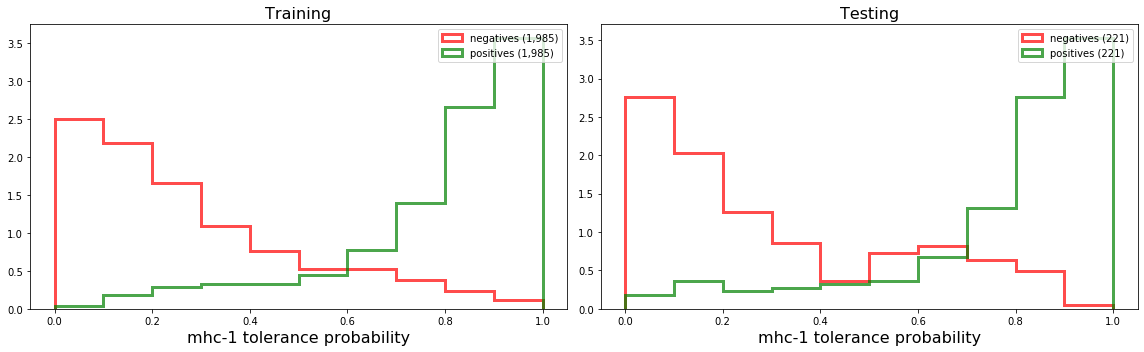

In [51]:
plt.figure(figsize=(16, 5))
dbin = 0.1
xlabel = 'mhc-1 tolerance probability'

plt.subplot(1, 2, 1)
pos_neg_histograms(df_y_train.loc[sequences_neg_train]["pred_dnn"], df_y_train.loc[sequences_pos_train]["pred_dnn"], title='Training', xlabel=xlabel, dbin=dbin)

plt.subplot(1, 2, 2)
pos_neg_histograms(df_y_test.loc[sequences_neg_test]["pred_dnn"], df_y_test.loc[sequences_pos_test]["pred_dnn"], title='Testing', xlabel=xlabel, dbin=dbin)

plt.tight_layout()

Text(0.5, 0, '$p$(class=positive)')

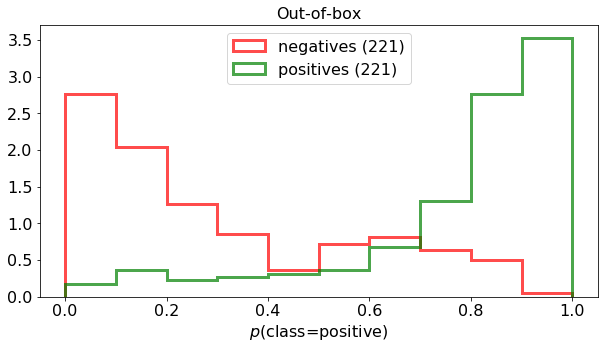

In [52]:
plt.figure(figsize=(10,5))
pos_neg_histograms(df_y_test.loc[sequences_neg_test]["pred_dnn"], df_y_test.loc[sequences_pos_test]["pred_dnn"], title='Out-of-box', xlabel=xlabel, dbin=dbin, legend=True)
plt.legend(loc='upper center', fontsize=fontsize)
plt.xticks(fontsize=fontsize); plt.yticks(fontsize=fontsize)
plt.xlabel('$p$(class=positive)')

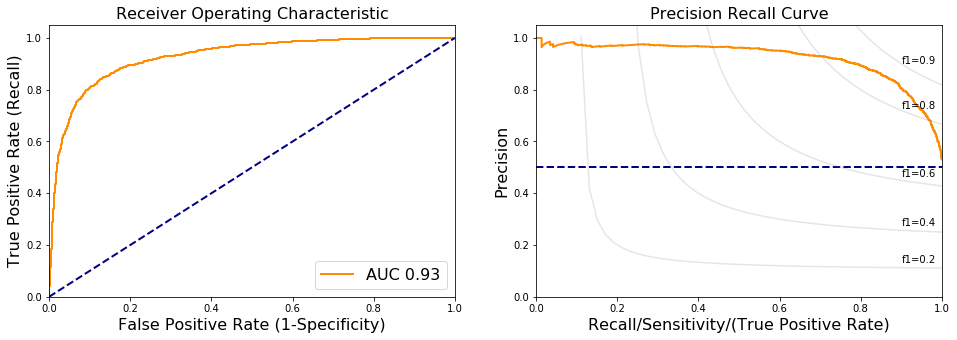

In [53]:
plot_precision_recall_roc(df_y_train['actual'], df_y_train['pred_dnn'])

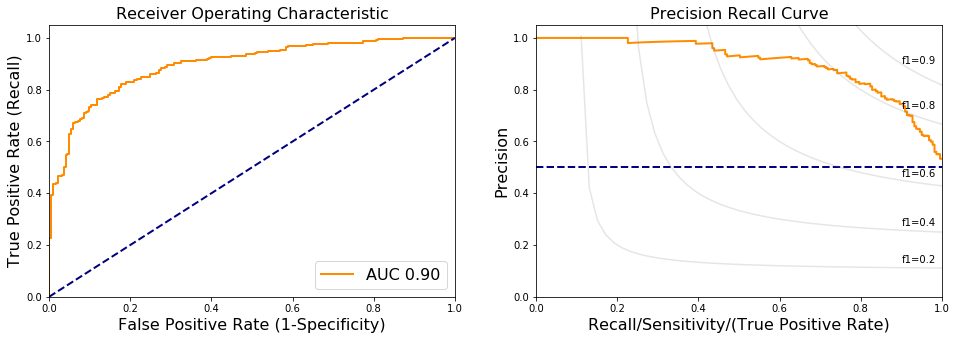

In [54]:
plot_precision_recall_roc(df_y_test['actual'], df_y_test['pred_dnn'])

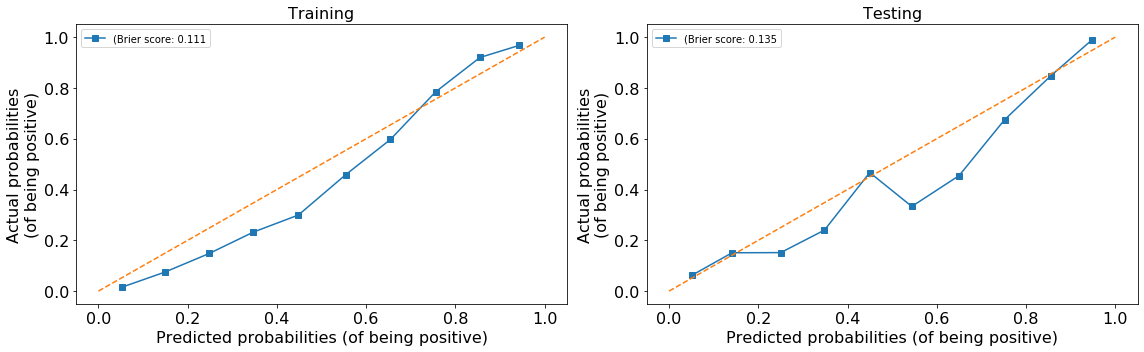

In [55]:
plt.figure(figsize=(16, 5))
n_bins = 10


plt.subplot(1, 2, 1)
plot_calibration_curve(df_y_train['actual'], df_y_train['pred_dnn'], n_bins=n_bins)
plt.title('Training', fontsize=fontsize)
plt.subplot(1, 2, 2)
plot_calibration_curve(df_y_test['actual'], df_y_test['pred_dnn'], n_bins=n_bins)
plt.title('Testing', fontsize=fontsize)


plt.tight_layout()